In [1]:
!pip install opencv-python numba

In [2]:
import cv2
import numpy as np
from numba import cuda
import time

In [3]:
img = cv2.imread('/kaggle/input/datasets/sriyaline/input-image/input.webp')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [4]:
start = time.time()

cpu_result = 255 - gray   # invert filter on CPU

end = time.time()
print("CPU Time:", end - start)


CPU Time: 0.0018317699432373047


In [5]:
@cuda.jit
def invert_kernel(image):
    x, y = cuda.grid(2)
    if x < image.shape[0] and y < image.shape[1]:
        image[x, y] = 255 - image[x, y]


In [6]:
d_img = cuda.to_device(gray)

threads = (16, 16)
blocks = (gray.shape[0]//16 + 1, gray.shape[1]//16 + 1)

start = time.time()

invert_kernel[blocks, threads](d_img)
cuda.synchronize()

gpu_result = d_img.copy_to_host()

end = time.time()
print("GPU Time:", end - start)


GPU Time: 1.114703893661499


In [7]:
cv2.imwrite('/kaggle/working/output.webp', gpu_result)


True

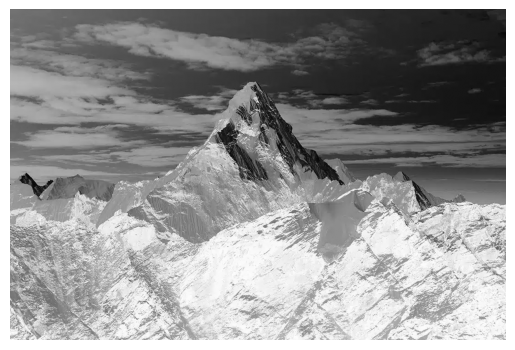

In [8]:
from matplotlib import pyplot as plt

plt.imshow(gpu_result, cmap='gray')
plt.axis('off')
plt.show()
